In [2]:
import pandas as pd
import numpy as np
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import scripts.preprocessing.selection.feature_selection as feature_selection
import scripts.preprocessing.cleaning.cleaning as cleaning
import scripts.preprocessing.outliers.outliers as outliers
import scripts.preprocessing.scaling.scaling as scaling
import scripts.preprocessing.encoding.encoding as encoding

In [3]:
df = pd.read_csv('../data/en.openfoodfacts.org.products.csv', delimiter='\t', usecols=['product_name', 'code'])
# df = outliers.process(df)

/tmp/ipykernel_578/1371608586.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/en.openfoodfacts.org.products.csv', delimiter='\t', usecols=['product_name', 'code'])


In [4]:
df1 = pd.read_csv('../data/cleaned_OFF_dataset.csv', delimiter='\t')

/tmp/ipykernel_578/3280982290.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../data/cleaned_OFF_dataset.csv', delimiter='\t')


In [5]:
for col in ['energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g']:
       cleaning.clean_by_impute(df1, method='median', column=col)

In [6]:
df.count()

code            2059358
product_name    1975981
dtype: int64

In [7]:
from sklearn.cluster import KMeans

In [8]:
X = df1.loc[:,['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g',                        # removed salt as it was 1to1 correlation with sodium
       'sodium_100g']] 


In [9]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',
                    max_iter = 300,    
                    n_init = 10,       
                    random_state = 0)  
    model.fit(X)                              
    wcss.append(model.inertia_)

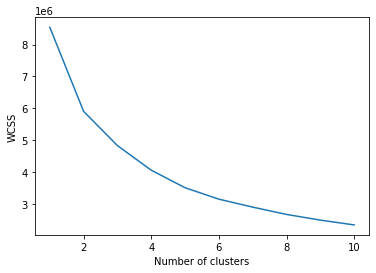

In [10]:
import matplotlib.pyplot as plt 
plt.plot(range(1, 11), wcss)                       
plt.xlabel('Number of clusters')                   
plt.ylabel('WCSS') 
plt.show()

In [11]:
model = KMeans(n_clusters = 3,     
                    init = 'k-means++',
                    max_iter = 300,    
                    n_init = 10)
model2 = KMeans(n_clusters = 5,     
                    init = 'k-means++',
                    max_iter = 300,    
                    n_init = 10)

In [12]:
pred_y = model.fit_predict(X)
pred_y2 = model2.fit_predict(X)

In [13]:
df1['kmeans3'] = pred_y
df1['kmeans5'] = pred_y2

In [14]:
df2 = df1.merge(df, on='code')

In [88]:
df2[['product_name', 'kmeans3', 'kmeans5','energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']].sample(10)

,product_name,kmeans3,kmeans5,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
964753,NaN,1,1,-0.181851,-0.411738,-0.441243,-0.445078,-0.454138,-0.230921,-0.227327,-0.227331
761456,Dinkel Flocken Großblatt,0,4,0.738221,-0.706602,-0.701744,1.369163,-0.694156,1.336881,-0.227327,-0.227331
524284,Saucirégal volaille goût boeuf,2,3,-0.440433,-0.054327,-0.098732,-0.716623,-0.722958,0.267925,1.832076,1.832077
560936,Yaourt fraise et framboise,1,1,-0.777191,-0.652991,-0.388178,-0.464755,0.486734,-0.601493,-0.815728,-0.815733
1225516,NaN,1,1,-0.181851,-0.411738,-0.441243,-0.445078,-0.454138,-0.230921,-0.227327,-0.227331
823265,Oregano gerebelt,1,1,-0.181851,-0.411738,-0.441243,-0.445078,-0.454138,-0.230921,-0.227327,-0.227331
1226308,Herz Kekse Knuspriger Keks mit Erdbeer-Cremefü...,0,0,1.574102,1.196611,2.385675,1.447872,2.022851,-0.173910,-0.470362,-0.470367
724033,Fromage blanc aux myrtilles,1,1,-0.181851,-0.411738,-0.441243,-0.445078,-0.454138,-0.230921,-0.982015,-0.982021
763352,Pomstick,1,1,-0.181851,-0.411738,-0.441243,-0.445078,-0.454138,-0.230921,0.425030,0.425028
95925,Asiago & Sundried tomato,0,4,1.475881,0.928553,-0.347969,1.762708,0.198712,-0.135898,0.936683,0.936682


<AxesSubplot:>

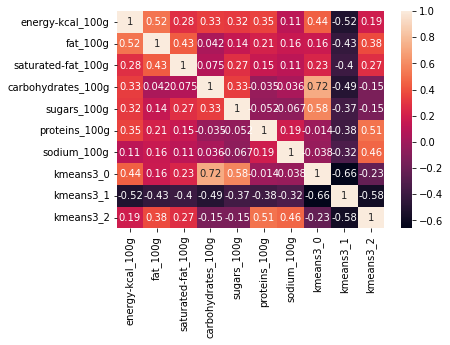

In [16]:
import seaborn as sns

# kmeans3_0 = df2.loc[df2['kmeans3'] == 0]
# kmeans3_1 = df2.loc[df2['kmeans3'] == 1]
# kmeans3_2 = df2.loc[df2['kmeans3'] == 2]

km3 = df2.loc[:, ['kmeans3','energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g']]


encoding.simple_encoder(km3, columns=['kmeans3'])

f = km3.applymap(lambda v: int(v)).corr()

sns.heatmap(f, annot=True)      

En regardant la heatmap ci dessus, on peut interpreter intuitivement les 3 clusters:
- Le cluster 2 correspond aux produits avec des valeurs élevées de sucres et de matiere grasse
- Le cluster 1 correspond aux produits avec des valeurs élevées de sodium
- Le cluster 0 correspond aux produits restants 

Ce clustering n'est pas acceptable car pas suffisament précis.

<AxesSubplot:>

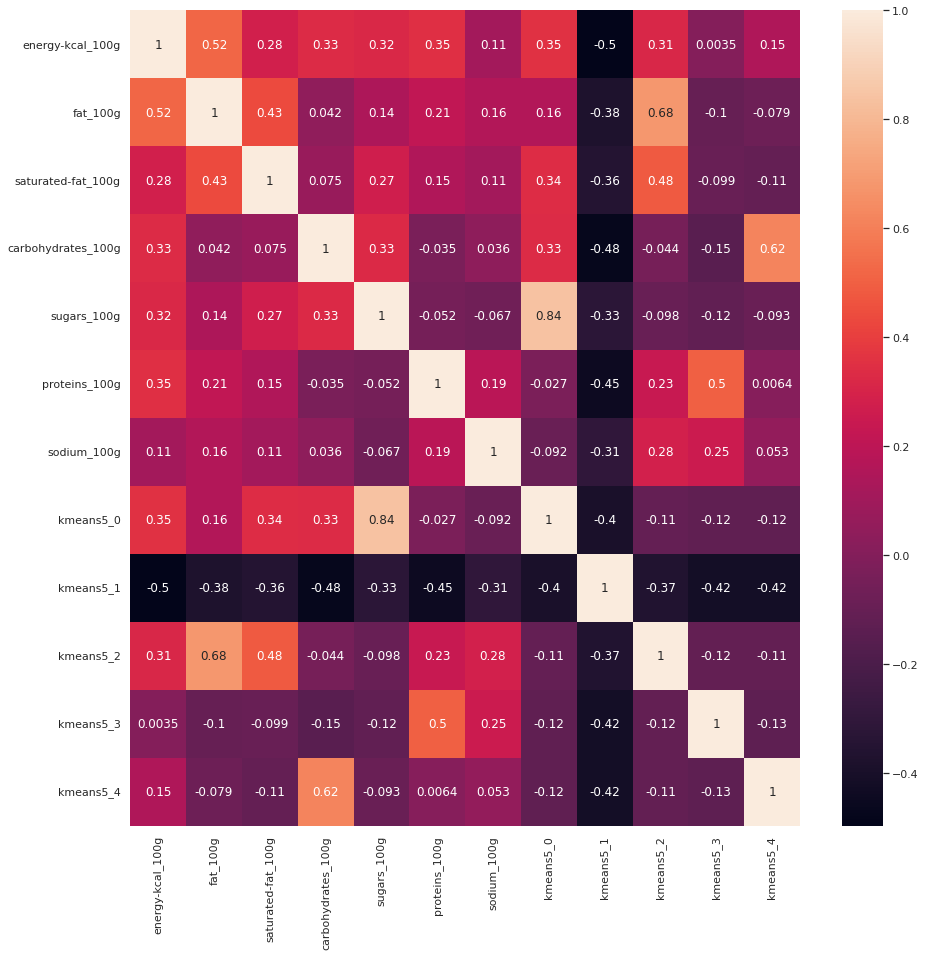

In [17]:
km5 = df2.loc[:, ['kmeans5','energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g']]

encoding.simple_encoder(km5, columns=['kmeans5'])

f = km5.applymap(lambda v: int(v)).corr()
sns.set(rc = {'figure.figsize':(15,15)})

sns.heatmap(f, annot=True)      

In [18]:
df2['kmeans5'].value_counts()

1    722240
3    147210
4    145189
0    132961
2    116513
Name: kmeans5, dtype: int64

Le classement en 5 groupes semble être plus précis. Sur la heatmap, nous pouvons bien voir la corrélation entre le cluster choisi et la valeur d'un macronutriment précis.
Cependant, la majorité du dataset est classé dans le cluster 1 qui ne semble être corrélé à rien.

In [19]:
df2[['product_name', 'kmeans5']].sample(10)

,product_name,kmeans5
657158,Rochers noix de coco,1
1103549,Donettes,0
398462,Kiwi Gold,1
341080,Bourguignon Assortiment BBC VBF S/V 60g,1
1204360,Integrino,2
1083896,Crusca,4
460517,NaN,1
417041,Rôtie de porc cuit à l'ancienne,1
1078014,Pate,4
69912,Pretzels,0


On peut observer certaines tendances qui se dégagent, par exemple dans le cluster 3 on trouve tout ce qu'on peut qualifier de produit riches en protéines (produits animaliers comme végétarien) tandis que dans le 4 on retrouve principalement des produits dérivès du blé.

In [98]:
cluster0 = df2['product_name'].where(df2['kmeans5'] == 0)
cluster1 = df2['product_name'].where(df2['kmeans5'] == 1)
cluster2 = df2['product_name'].where(df2['kmeans5'] == 2)
cluster3 = df2['product_name'].where(df2['kmeans5'] == 3)
cluster4 = df2['product_name'].where(df2['kmeans5'] == 4)

# Dropping rows where there is no product name
cluster0.dropna(inplace=True)
cluster1.dropna(inplace=True)
cluster2.dropna(inplace=True)
cluster3.dropna(inplace=True)
cluster4.dropna(inplace=True)

In [21]:
import nltk
import collections as co
from io import StringIO

In [22]:
s_arr = []


def sio_factory():
    return StringIO()

for cluster in [cluster0, cluster1, cluster2, cluster3, cluster4]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()


In [23]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/qtzzz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/qtzzz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
stop_words = set(stopwords.words('english'))
stop_words_fr = set(stopwords.words('french'))
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_italian = set(stopwords.words('italian'))

# stop_words = [stop_words_en, stop_words_fr, stop_words_spanish, stop_words_italian]
stop_words |= stop_words_fr 
stop_words |= stop_words_spanish
stop_words |= stop_words_italian

stop_words.add('free')
stop_words.add('style')
stop_words.add('mini')
stop_words.add('bio')
stop_words.add('s')
stop_words.add('n')
stop_words.add('mit')

In [77]:
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    # for stop in stop_words:
    #     # cleaned.append([w for w in tokenized if not w.lower() in stop_words])
    #     filtered_tokenized = list(filter(lambda x: x!= stop, tokenized))
    #     # try:
    #     #     tokenized.remove(stop)
    #     # except ValueError:
    #     #     pass
    # tokenized = tokenized.difference(stop_words)
    cleaned.append(filtered_tokenized)

In [78]:
print(len(cleaned))

5


In [79]:
final = []
for i in cleaned:
    final.append(' '.join(i))

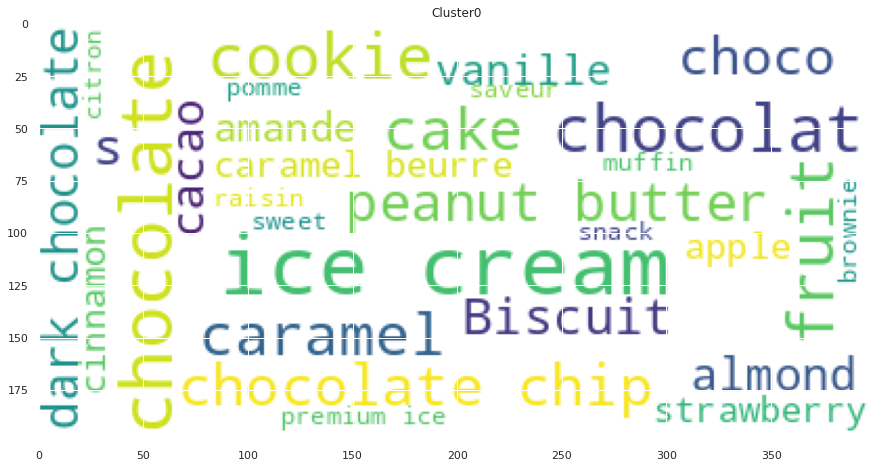

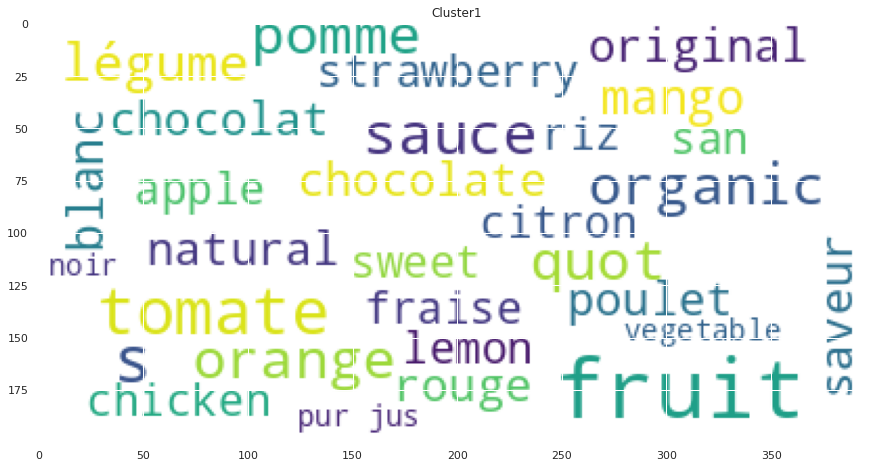

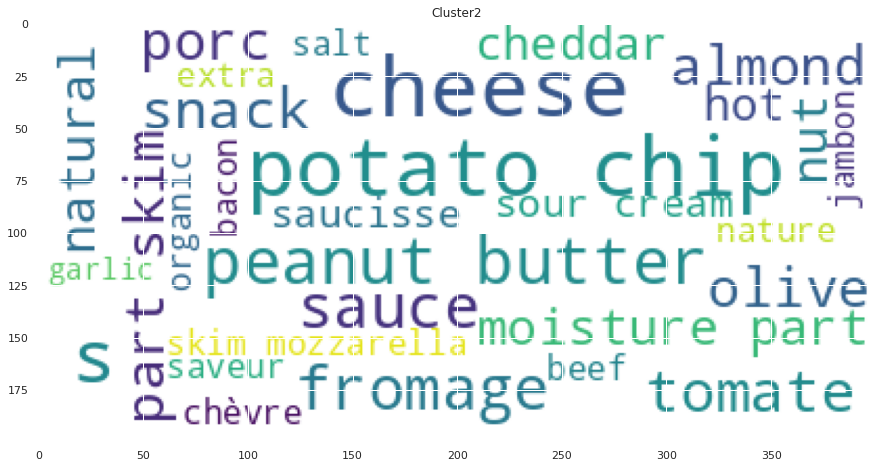

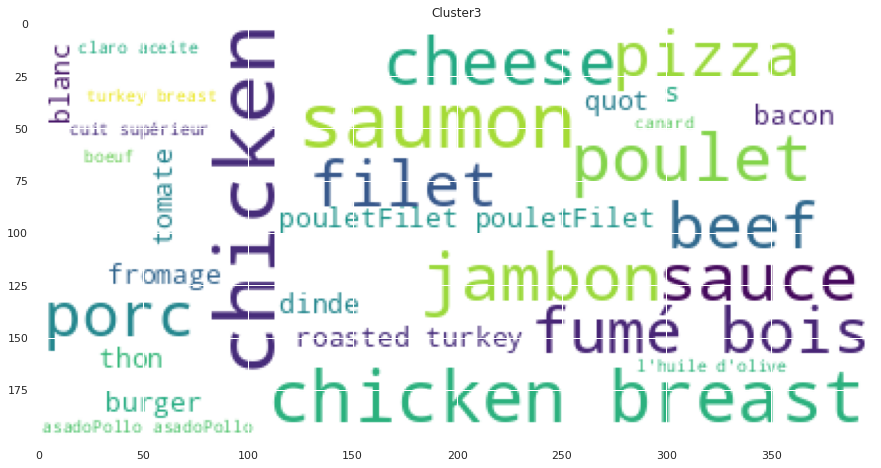

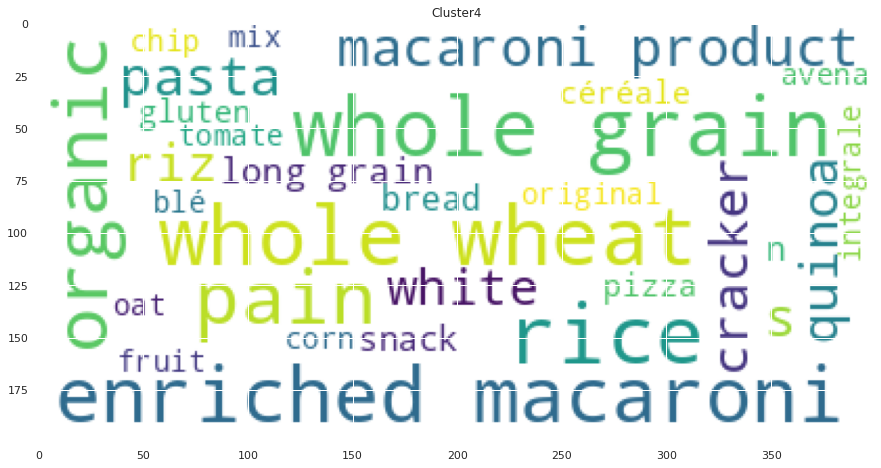

In [80]:

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    # fig, axs = plt.subplots(5)
    # axs[i].imshow(wordcloud)
    plt.title('Cluster' + str(i))
    # plt.figure()
    plt.imshow(wordcloud)
    plt.show()


# for i, s in enumerate(final):
#     print(s)
#     print(i)

# text = cleaned[0]
# wordcloud = WordCloud(background_color="white",max_words=len(cleaned[0]),max_font_size=40, relative_scaling=.5).generate(text)
# plt.figure()
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()




Nous pouvons voir ici un classement bien plus cohérent, mis à part le cluster 1 qui semble comporter les éléments qui ne vont pas dans les autres. Nous pouvons voir principalement dans le wordcloud des fruits et des légumes pour ce cluster là, c'est probablement parceque ces éléments ne pouvaient pas être mis dans les autres groupes.